# Data Visualization in Python

Can Şerif Mekik

PhD Candidate <br/>
Department of Cognitive Science <br/>
Rensselaer Polytechnic Institute

December 13, 2021

<table align="left">
<tr>
<td><img src=CDSI_Fac.of.Sc_logo.png alt="CDSI Logo" width="300"/></td>
<td><img src=mcgill_ccr_approval_croppedforblock_0.png alt="CCR Approved Logo" width="300"/></td>
</tr>
</table>

## Introductory Remarks

This workshop assumes minimal working knowledge of Python. 

We will learn the basics of using the `matplotlib` library for producing beautiful data visualizations.

Matplotlib is the standard plotting package in Python. It is very flexible, capable of creating basic 2D plots, 3D plots, and even animations.

Working knowledge of the Pandas package is an asset, although it is not required. 

We will use `pandas` to prepare our data for plotting.

This workshop is heavily inspired by Ben Root's [Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib/tree/master/).

### Useful Resources

The [Matplotlib Cheatsheet](https://matplotlib.org/cheatsheets/cheatsheets.pdf) is an excellent two-page summary of essential `matplotlib` features.

The [Official Matplotlib Docs](https://matplotlib.org/stable/index.html) are the single best resource for information short of the source code. It contains tutorials, reference documentation and more.

The [Example Gallery](https://matplotlib.org/stable/gallery/index.html) is particularly helpful when you have something specific in mind.

### Contents

1. Setup
2. Basic Concepts
3. Essential Plotting Methods
4. Controlling Figure Appearance
5. More Advanced Plotting: Grouping, Multiple Subplots & Faceting  
6. Conclusion

## Setup

We will create and adjust various graphs using the matplotlib library.

To follow the workshop on your own machine, you should have Anaconda already installed.

https://www.anaconda.com/products/individual

This will automatically include the necessary dependencies.

Our data set is a subset of Semra Sevi's Canadian Federal Elections dataset.

You can find a copies of the dataset and code at the following addresses.

- Code: 
- Data:  

### Getting Ready to Code

`Jupyter` is a python tool for rich interactive coding that ships with Anaconda.

This presentation uses `Jupyter` notebook, in fact!

To get set, create a new folder in which you will work and copy the materials into it.

Then launch your machines console, navigate to your folder, activate your conda environment, and run the following.

```jupyter notebook```

This should launch Jupyter notebook in your browser. When it does, you can open the notebook.

#### Installing and Importing pandas

`pandas` comes pre-packaged in Anaconda.

You can always install it using the following pip command: ```pip install pandas```

If you have conda, but not pandas, you can also do: ```conda install pandas```

In [1]:
import pandas as pd

df = pd.read_pickle("cleaned.pkl")

# Inspect the variable metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18090 entries, 27908 to 46525
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   parliament         18090 non-null  int64         
 1   edate              18090 non-null  datetime64[ns]
 2   year               18090 non-null  int64         
 3   province           18090 non-null  category      
 4   riding             18090 non-null  category      
 5   id                 18090 non-null  category      
 6   candidate_name     18090 non-null  object        
 7   birth_year         3024 non-null   Int64         
 8   gender             18089 non-null  category      
 9   censuscategory     15131 non-null  category      
 10  party_major_group  18090 non-null  category      
 11  votes              18076 non-null  Int64         
 12  percent_votes      18076 non-null  float64       
 13  elected            18090 non-null  category      
 14  ag

#### Installing and Importing matplotlib

`matplotlib` comes pre-packaged in Anaconda.

You can always install it using the following pip command: ```pip install matplotlib```

If you have conda, but not pandas, you can also do: ```conda install matplotib```

When used with jupyter notebooks, matplotlib exhibits some specialized behavior. 

To get it to behave more like it would in a script, we run the following code snippet.

In [2]:
import matplotlib as mpl
mpl.use("nbagg")

The standard way to start using matplotlib is to run the following snippet.

In [3]:
import matplotlib.pyplot as plt

## Basic Concepts

Matplotlib figures are complex objects, so it is important to have a general understanding of their structure.

We'll start with that.

### Figure Creation vs. Display

Before getting into theory, let's take a quick look at the basic mechanics of creating and displaying figures.

<IPython.core.display.Javascript object>


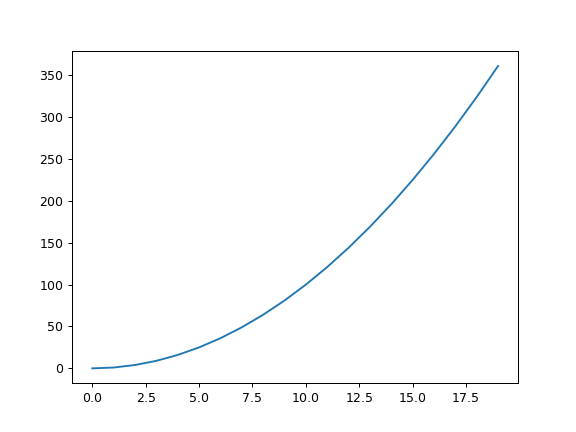

In [4]:
# Create some data
X, Y = [i for i in range(20)], [i ** 2 for i in range(20)]

plt.plot(X, Y) # Create a line plot of the data on 'current' figure
plt.show() # Show the result

This quick example hides a lot of detail. 

It's not uncommon to write code like this when trying to quickly understand what's going on with a dataset.

You should retain a few things from this example:
- We didn't have to explicitly create or configure a new figure because matplotlib always tracks a 'current' figure (similar to matlab). This is very convenient, but is not always the best option.
- To display or render a figure that we have created we **must** call `plt.show()` or something similar.
- Matplotlib figures are interactive: you can zoom, pan, save, etc.

### Anatomy of a Figure

To get a sense for the different components of a matplotlib figure, take a look at the image below. 

<img src=anatomy_of_a_figure.png alt="CDSI Logo" width="500"/>

This image is provided in the matplotlib docs, and its source code can be found [here](https://matplotlib.org/stable/gallery/showcase/anatomy.html).

Taking a step back, here are the main components of a figure:
- The `Figure` object, which contains all figure components
- `Axes`/`Subplots` which house the individual axes of each subplot 
- `XAxis`, `YAxis` in each subplot, which house data about individual axes (tick marks etc.)
- Other stuff

### Explicitly Initializing and Closing Figures.

Instead of using plotting functions from pyplot, like `plt.plot()`, it is better to create and work with `Axes` objects.

This style is more explicit and, ultimately, more flexible.

<IPython.core.display.Javascript object>


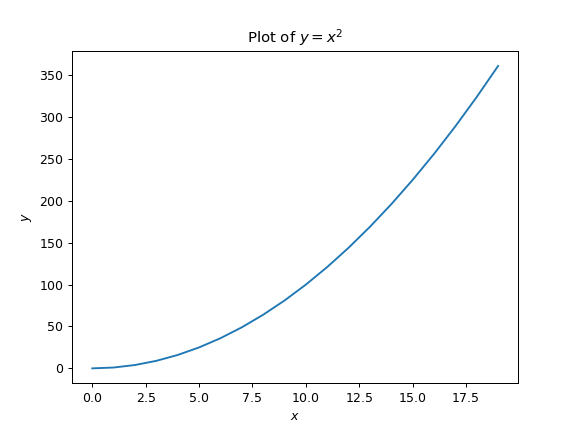

In [31]:
# Create some data
X, Y = [i for i in range(20)], [i ** 2 for i in range(20)]

fig, ax = plt.subplots() # Create a new figure with 1 subplot
# This function returns a tuple. The first element is the new figure.
# The second element is an `Axes` object if only one subplot is requested,
# Otherwise it is an array of `Axes` objects.

ax.set( # Add some labels
    title="Plot of $y = x^2$",
    xlabel="$x$",
    ylabel="$y$")

ax.plot(X, Y) # Create a line plot of the data on 'current' figure

fig.show() # Show the result

You can save the figure we just created as follows.

In [6]:
fig.savefig("example.png")

If you create and save a lot of figures programmatically, you might have to explicitly close figure to save memory, as below.

This is an unfortunate quirk of matplotlib. There are other workarounds that may be more or less suitable depending on your situation, but they are a bit more advanced and not covered in further detail here.

Notice that when you run the `plt.close()` on `fig`, it loses interactivity.

In [7]:
plt.close(fig)

## Essential Plotting Methods

Let's survey how to create some common plot types. 

We'll focus on typical statistical plots. See the [plot types](https://matplotlib.org/stable/plot_types/index.html) page for a more complete listing (e.g., quivers). 

### `ax.hist()`

[Reference Documentation]()

Plots a histogram.

Great for getting a sense of the distribution of a continuous variable.

<IPython.core.display.Javascript object>


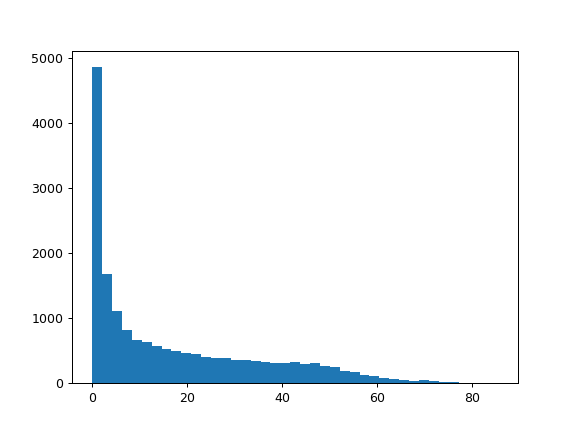

In [8]:
fig, ax = plt.subplots()
ax.hist(df.percent_votes.dropna(), bins="auto")
plt.show()

#### Exercise

Create a histogram of the margins of victory.

Try different integer values for the `bins` parameter. What do you observe?

<IPython.core.display.Javascript object>


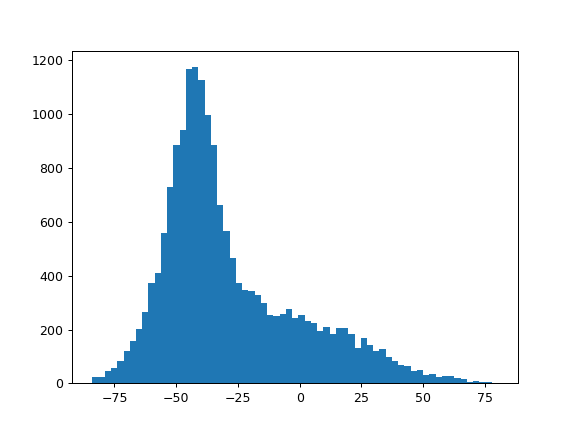

In [9]:
fig, ax = plt.subplots()
ax.hist(df.margin.dropna(), bins="auto")
plt.show()

### `ax.boxplot()`

[Reference Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html?highlight=boxplot#matplotlib.axes.Axes.boxplot)

Creates boxplots.

Classic plot for succinctly reporting non-parametric descriptives about a variable.

Plots, for each variable, the median and interquartile range. 

Marks outliers that are more than 1.5xIQR less than Q1 or more than Q3.

<IPython.core.display.Javascript object>


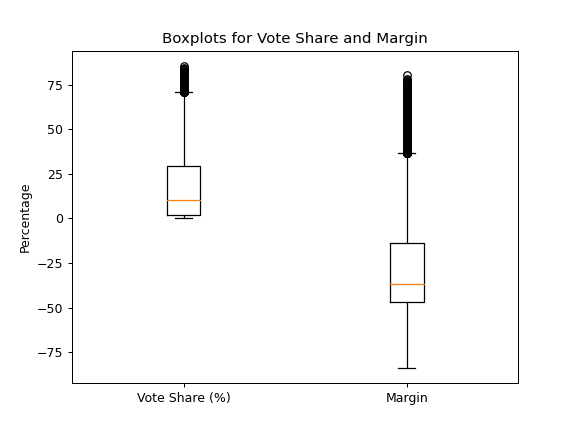

In [10]:
# If we wanted, we could produce a for only one variable.
# This code demonstrates how to put multiple boxplots on the same axes.

data = (df[["percent_votes", "margin"]]
    .rename(columns={"percent_votes": "Vote Share (%)", "margin":"Margin"}))

fig, ax = plt.subplots(1)

ax.set(
    title="Boxplots for Vote Share and Margin",
    ylabel="Percentage")

ax.boxplot(
    data.dropna(), 
    labels=data.columns)

fig.show()

#### Exercise

Create a boxplot for the number of votes.

<IPython.core.display.Javascript object>


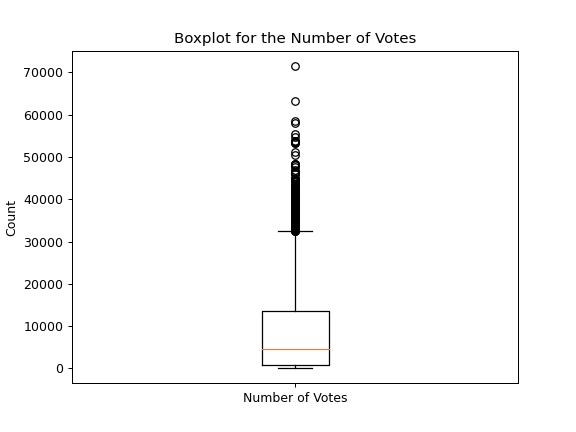

In [11]:
data = df

fig, ax = plt.subplots(1)

ax.set(
    title="Boxplot for the Number of Votes",
    ylabel="Count")

ax.boxplot(
    data.votes.dropna(), 
    labels=["Number of Votes"])

fig.show()

### `ax.violinplot()`

[Reference Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.violinplot.html?highlight=violinplot#matplotlib.axes.Axes.violinplot)

Violin plots combine the information contained in histograms and boxplots in one neat plot.

<IPython.core.display.Javascript object>


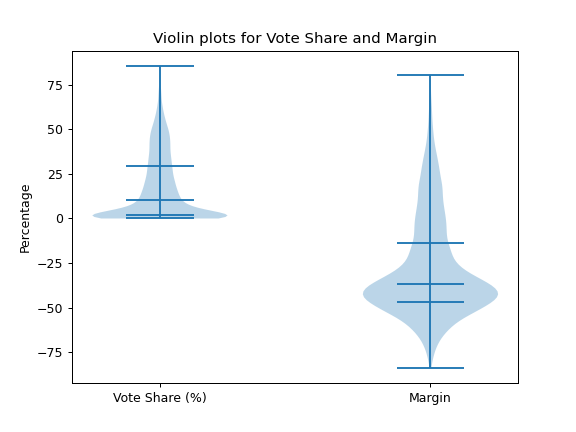

In [12]:
# If we wanted, we could produce a violin plot for only one variable.
# This code demonstrates how to put multiple boxplots on the same axes.

data = (
    df[["percent_votes", "margin"]]
    .rename(columns={"percent_votes": "Vote Share (%)", "margin":"Margin"}))

fig, ax = plt.subplots(1)

ax.set(
    title="Violin plots for Vote Share and Margin",
    ylabel="Percentage",
    xticks=[1, 2],
    xticklabels=data.columns)

ax.violinplot(
    data.dropna(),
    showmedians=True,
    quantiles=[[0.25, 0.75], [0.25, 0.75]])

fig.show()

#### Exercise

Create a violin plot for the number of votes. Include marks for the medians as well as the Q33 and Q66.

Hint: Make sure the data have dtype float.

<IPython.core.display.Javascript object>


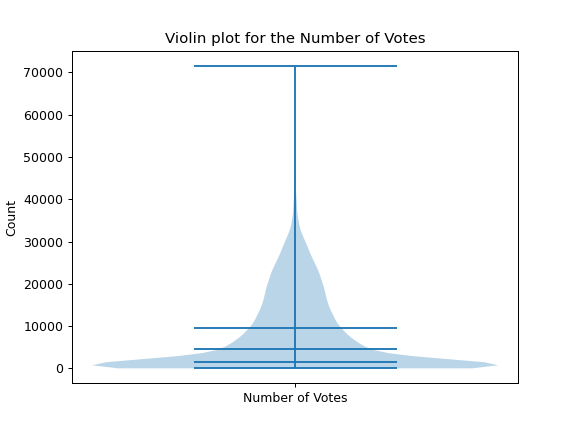

In [13]:
fig, ax = plt.subplots(1)

ax.set(
    title="Violin plot for the Number of Votes",
    ylabel="Count",
    xticks=[1],
    xticklabels=["Number of Votes"])

ax.violinplot(
    df.votes.astype("float").dropna(),
    showmedians=True,
    quantiles=[0.33, 0.66])

fig.show()

### `ax.bar()`

[Reference Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

Bar charts, optionally with error bars.

Ideal for plotting statistics for data grouped by categories.

Default is vertical, but can construct horizontal bars using [`ax.barh()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html).

  gender       mean       sem
0     NB   4.452709  3.233518
1      F  16.779326  0.241824
2      M  17.614181  0.165344


<IPython.core.display.Javascript object>


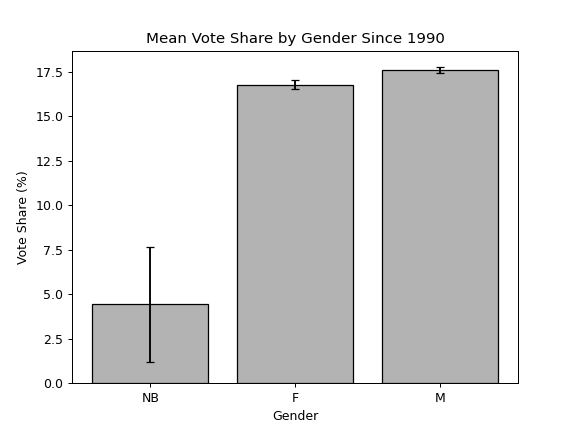

In [14]:
gs = df.groupby("gender").percent_votes
pct_votes_x_gender = (
    pd.concat(
        [gs.mean().rename("mean"), gs.sem().rename("sem")], 
        axis=1)
    .reset_index())

print(pct_votes_x_gender)

fig, ax = plt.subplots(1)

ax.set(
    title="Mean Vote Share by Gender Since 1990",
    xlabel="Gender",
    ylabel="Vote Share (%)")

ax.bar(
    x="gender", 
    height="mean", 
    yerr="sem", 
    data=pct_votes_x_gender, 
    linewidth=1,
    capsize=3,
    color="0.7",
    edgecolor="k"
    )

fig.show()

#### Exercise

Create a bar graph showing the mean vote share by incumbency status for the 2021 election with error bars.

     incumbency       mean       sem
0     Incumbent  47.156986  0.253271
1  Nonincumbent  10.654639  0.225308


<IPython.core.display.Javascript object>


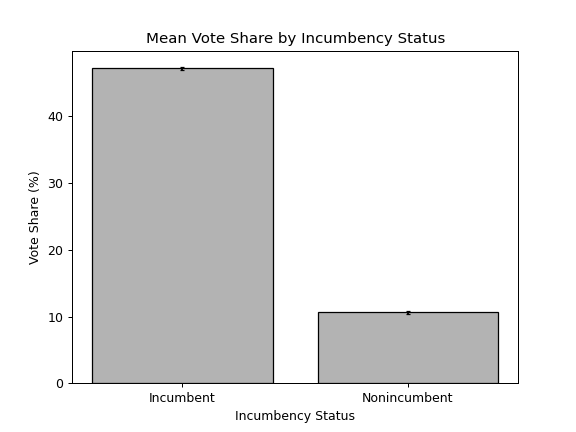

In [15]:
# Strictly speaking, this variable is not 100% accurate. Can you figure out why?
df["incumbency"] = (df
     .sort_values(["id", "year"])
     .groupby("id")
     .elected
     .shift()
     .cat.rename_categories({"Elected": "Incumbent", "Not elected": "Nonincumbent"}))


gs = df.groupby("incumbency").percent_votes
pct_votes_x_incumbency = (
    pd.concat(
        [gs.mean().rename("mean"), gs.sem().rename("sem")], 
        axis=1)
    .reset_index())

print(pct_votes_x_incumbency)

fig, ax = plt.subplots(1)

ax.set(
    title="Mean Vote Share by Incumbency Status",
    xlabel="Incumbency Status",
    ylabel="Vote Share (%)")

ax.bar(
    x="incumbency", 
    height="mean", 
    yerr="sem", 
    data=pct_votes_x_incumbency, 
    linewidth=1,
    capsize=2,
    color="0.7",
    edgecolor="k"
    )

fig.show()

### `ax.errorbar()`

Another graph for presenting estimates by category is [`ax.errorbar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.errorbar.html).

Here is the same information as in the initial bar plot, using errorbar instead.

  gender       mean       sem
0     NB   4.452709  3.233518
1      F  16.779326  0.241824
2      M  17.614181  0.165344


<IPython.core.display.Javascript object>


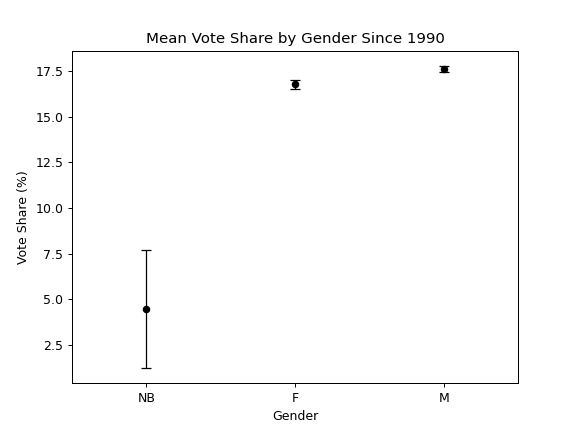

In [34]:
gs = df.groupby("gender").percent_votes
pct_votes_x_gender = (
    pd.concat(
        [gs.mean().rename("mean"), gs.sem().rename("sem")], 
        axis=1)
    .reset_index())

print(pct_votes_x_gender)

fig, ax = plt.subplots(1)

ax.set(
    xlim=[-.5, 2.5],
    title="Mean Vote Share by Gender Since 1990",
    xlabel="Gender",
    ylabel="Vote Share (%)")

ax.errorbar(
    x="gender", 
    y="mean", 
    yerr="sem", 
    data=pct_votes_x_gender, 
    fmt="o",
    linewidth=1,
    capsize=4,
    color="k",
    markersize=5
    )

fig.show()

### `ax.plot()`

[Reference Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

Plot a function.

Ideal for situations where $y$ and $x$ are ordered or continuous variables and $y$ is a function of $x$ (i.e., there is exactly one $y$ value for each $x$ value).

Can plot markers, lines or both.

   year   num  num_MPs  num_women  num_women_MPs  pct_w_cand  pct_w_MPs
0  1993  2156      295        476             53   22.077922  17.966102
1  1997  1672      301        408             62   24.401914  20.598007
2  2000  1808      301        373             62   20.630531  20.598007
3  2004  1685      308        393             65   23.323442  21.103896
4  2006  1634      308        381             64   23.317013  20.779221
5  2008  1601      308        446             69   27.857589  22.402597
6  2011  1587      308        451             76   28.418399  24.675325
7  2015  1792      338        534             88   29.799107  26.035503
8  2019  2145      338        749             98   34.918415  28.994083
9  2021  2010      338        762            102   37.910448  30.177515


<IPython.core.display.Javascript object>


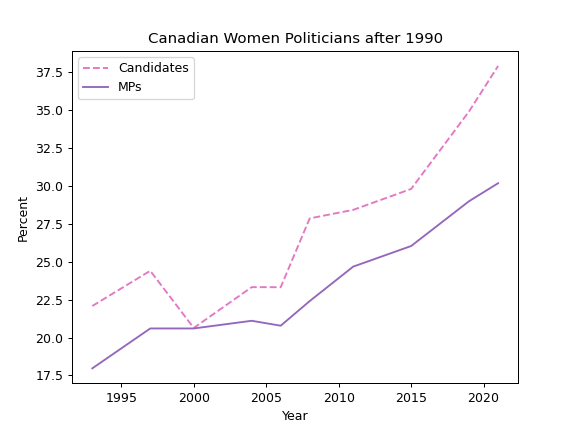

In [17]:
# calculate percentage of women candidates and MPs in each election

candidates = pd.DataFrame({
              "num": df.groupby("year").id.nunique(),
          "num_MPs": df[df.elected == "Elected"].copy().groupby("year").id.nunique(),
        "num_women": df[df.gender == "F"].copy().groupby("year").id.nunique(),
    "num_women_MPs": df[(df.gender == "F") & (df.elected == "Elected")].copy().groupby("year").id.nunique(),
})

candidates["pct_w_cand"] = 100 * candidates.num_women / candidates.num
candidates["pct_w_MPs"] = 100 * candidates.num_women_MPs / candidates.num_MPs
candidates = candidates.reset_index()

print(candidates)

# Create the plot

# Note that we can put multiple plots on the same Axes object.
# Also note that we can pass the variable name with pandas data object.
# Alternatively, we could directly pass the data.

fig, ax = plt.subplots(1)

ax.set(
    title="Canadian Women Politicians after 1990",
    xlabel="Year",
    ylabel="Percent")

ax.plot("year", "pct_w_cand", "C6--", data=candidates, label="Candidates")
ax.plot("year", "pct_w_MPs", "C4-", data=candidates, label="MPs")

ax.legend()

fig.show()

#### Exercise

Plot age over time.

Hint: Convert age to dtype float.

   year        age
0  1993  48.318644
1  1997  49.390728
2  2000  51.222591
3  2004  51.496753
4  2006  51.659091
5  2008  51.561688
6  2011  50.332248
7  2015  50.232416
8  2019  51.190625
9  2021  52.520161


<IPython.core.display.Javascript object>


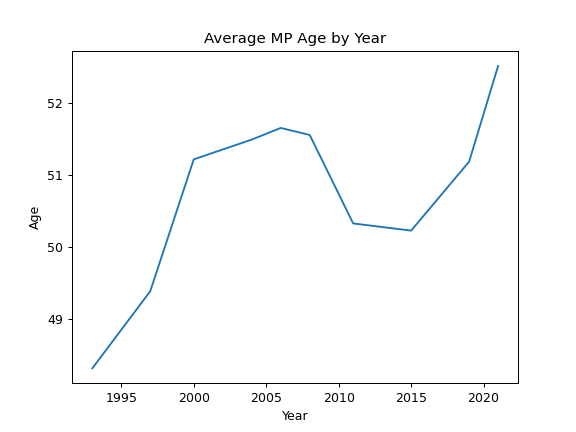

In [18]:
data = df.copy()
data["age"] = data.age.astype("float")
data = data.groupby("year").age.mean().reset_index()
print(data)

fig, ax = plt.subplots()

ax.set(
    title="Average MP Age by Year",
    xlabel="Year",
    ylabel="Age")

ax.plot("year", "age", "-", data=data)

fig.show()

### `ax.fill_between()`

[Reference Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html)

Fills the area between two sets of $y$ values (second $y$ value defaults to 0). 

Good for presenting uncertainties in continuous estimates.

   year       mean       sem         ul         ll
0  1993  13.714551  0.396957  14.492587  12.936515
1  1997  18.002392  0.433408  18.851871  17.152913
2  2000  16.666667  0.448464  17.545656  15.787677
3  2004  18.289786  0.460857  19.193067  17.386506
4  2006  18.849449  0.452508  19.736365  17.962533
5  2008  19.237976  0.451372  20.122665  18.353287
6  2011  19.407687  0.478099  20.344761  18.470614
7  2015  18.868981  0.443594  19.738425  17.999536
8  2019  15.757576  0.386268  16.514661  15.000491
9  2021  16.815920  0.390166  17.580646  16.051195


<IPython.core.display.Javascript object>


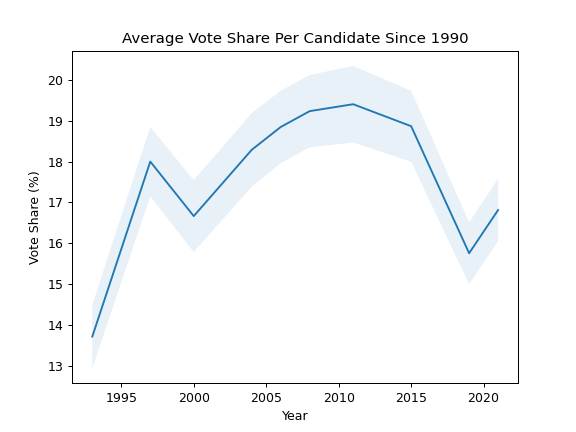

In [19]:
gs = df.groupby("year").percent_votes
data = (
    pd.concat(
        [gs.mean().rename("mean"), gs.sem().rename("sem")],
        axis=1)
    .reset_index())

data["ul"] = data["mean"] + 1.96 * data["sem"]
data["ll"] = data["mean"] - 1.96 * data["sem"]

print(data)

fig, ax = plt.subplots(1)

ax.set(
    title="Average Vote Share Per Candidate Since 1990",
    xlabel="Year",
    ylabel="Vote Share (%)")

ax.plot("year", "mean", "-", data=data)
ax.fill_between(
    x="year", 
    y1="ul", 
    y2="ll", 
    data=data,
    alpha=.1)

fig.show()

#### Exercise

Produce a similar graph for the margin of victory.

   year       mean       sem         ul         ll
0  1993 -33.640873  0.625487 -32.414918 -34.866828
1  1997 -26.224611  0.654790 -24.941222 -27.507999
2  2000 -30.900167  0.684031 -29.559468 -32.240867
3  2004 -27.649049  0.683028 -26.310315 -28.987783
4  2006 -25.881088  0.676529 -24.555092 -27.207084
5  2008 -25.460531  0.704718 -24.079285 -26.841777
6  2011 -26.408196  0.725036 -24.987125 -27.829268
7  2015 -25.725544  0.651338 -24.448921 -27.002167
8  2019 -29.365352  0.602212 -28.185017 -30.545688
9  2021 -27.798288  0.583805 -26.654030 -28.942545


<IPython.core.display.Javascript object>


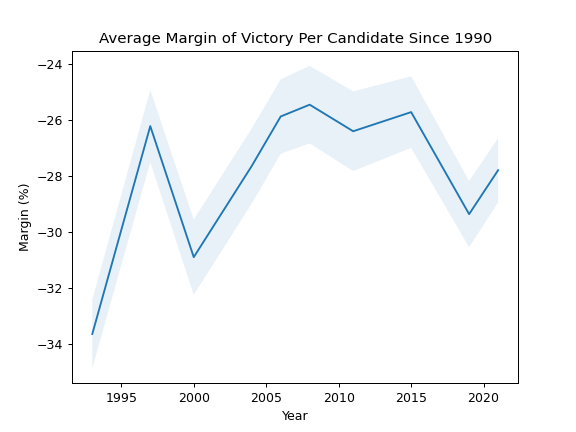

In [20]:
gs = df.groupby("year").margin
data = (
    pd.concat(
        [gs.mean().rename("mean"), gs.sem().rename("sem")],
        axis=1)
    .reset_index())

data["ul"] = data["mean"] + 1.96 * data["sem"]
data["ll"] = data["mean"] - 1.96 * data["sem"]

print(data)

fig, ax = plt.subplots(1)

ax.set(
    title="Average Margin of Victory Per Candidate Since 1990",
    xlabel="Year",
    ylabel="Margin (%)")

ax.plot("year", "mean", "-", data=data)
ax.fill_between(
    x="year", 
    y1="ul", 
    y2="ll", 
    data=data,
    alpha=.1)

fig.show()

### `ax.scatter()`

[Reference Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

Creates a scatter plot.

Ideal when your data may be viewed as points in a two-dimensional space.

You can map values to marker colors and sizes as well, allowing you to represent higher dimensional data.

<IPython.core.display.Javascript object>


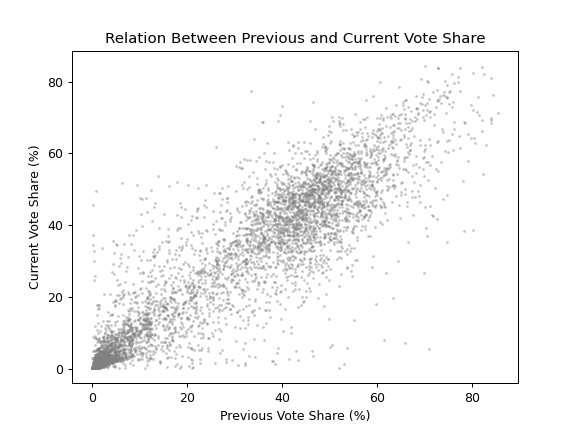

In [21]:
data = df.sort_values(["id", "year"])
data["percent_votes_lag"] = data.groupby("id").percent_votes.shift()
data

fig, ax = plt.subplots(1)

ax.set(
    title="Relation Between Previous and Current Vote Share",
    xlabel="Previous Vote Share (%)",
    ylabel="Current Vote Share (%)")

ax.scatter(
    x="percent_votes_lag", 
    y="percent_votes",
    s=2,
    alpha=.3,
    color="gray",
    data=data[["percent_votes_lag", "percent_votes"]].dropna())

plt.show()

Let's try mapping a variable to dot color.

<IPython.core.display.Javascript object>


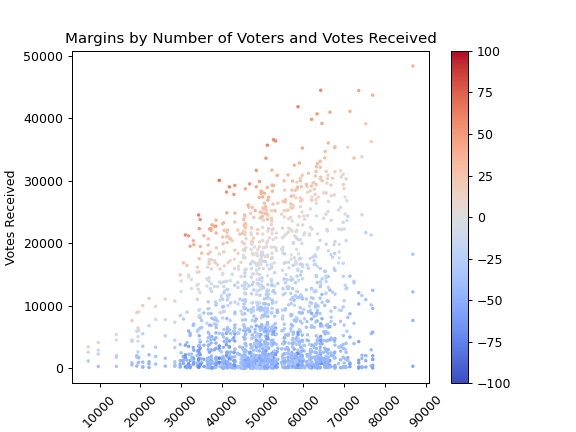

In [22]:
# Calculate the number of votes cast in each riding
data = df[df.year == 2021].copy()
data["num_votes"] = data.groupby(["year", "province", "riding"]).votes.transform(sum)


# Plot the margin against the number of votes in riding and number of votes received.
fig, ax = plt.subplots(1)

ax.set(
    title="Margins by Number of Voters and Votes Received",
    xlabel="Number of Voters",
    ylabel="Votes Received")
ax.tick_params(axis="x", labelrotation = 45)

sc = ax.scatter(
    x="num_votes", 
    y="votes", 
    s=3, 
    c="margin", 
    data=data,
    cmap="coolwarm",
    vmin=-100,
    vmax=+100)

fig.colorbar(sc)

plt.show()

#### Exercise

Create a graph similar to the one above, but mapping `percent_votes` to point size instead df mapping `margin` to point color. 

Can you adjust the point size so that it looks nice?

<IPython.core.display.Javascript object>


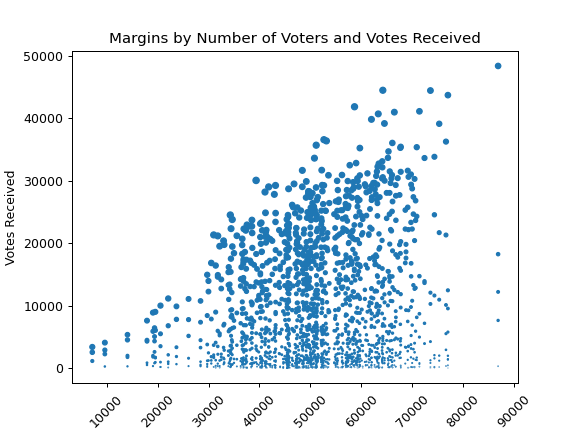

In [23]:
# Calculate the number of votes cast in each riding
data = df[df.year == 2021].copy()
data["num_votes"] = data.groupby(["year", "province", "riding"]).votes.transform(sum)
data.percent_votes = data.percent_votes / 3

# Plot the margin against the number of votes in riding and number of votes received.
fig, ax = plt.subplots(1)

ax.set(
    title="Margins by Number of Voters and Votes Received",
    xlabel="Number of Voters",
    ylabel="Votes Received")
ax.tick_params(axis="x", labelrotation = 45)

ax.scatter(
    x="num_votes", 
    y="votes", 
    s="percent_votes",
    data=data)

plt.show()

## Controlling Plot Appearance

We've already seen how to control several aspects of plot appearance.

Let's go into some more detail.

Parts of this section are taken directly from Ben Root's  [Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib/tree/master/).

### `ax.set(...)` vs. `ax.set_<property>(...)`

So far we have used the `ax.set(...)` command to control many aspects of plot appearance.

This method is great if you quickly want to make adjustments. 

So far we have adjusted titles, labels, and ticks. But you can do more with `ax.set()`, like adjusting plotting limits.

See [the documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html?highlight=set#matplotlib.axes.Axes.set) for a full list of options.

`ax.set()` can be limiting if you want to control details.

For instance suppose we want to control the size and font of the title of a graph.

In this situation, we can't use `ax.set()`, instead we need to use `ax.set_title(...)`.

<IPython.core.display.Javascript object>


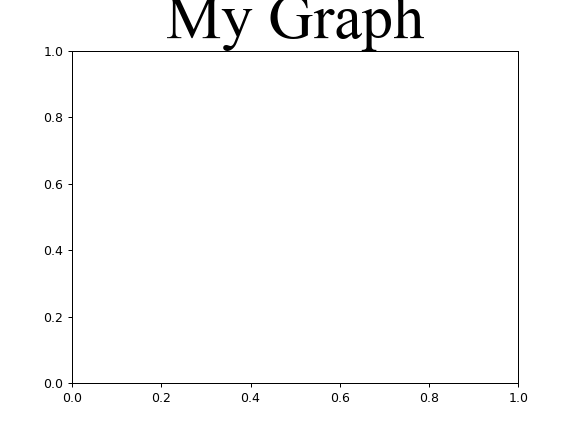

In [24]:
fig, ax = plt.subplots()
ax.set_title("My Graph", font="Times New Roman", size="50")
fig.show()

### `fig.set()`

[Reference Documentation](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.set)

You can set some top-level figure parameters using `fig.set()`.

You mainly use this method to adjust the size, aspect ratio, and resolution of a figure.

### Robust Customization

[RcParams and Style Customization Tutorial](https://matplotlib.org/stable/tutorials/introductory/customizing.html)

You can imagine that styling each figure individually can get old. Luckily there are a few solutions for this.

First, it is possible to adjust all defaults provided by matplotlib by playing with the `rcParams` ('rc' for 'runtime configuration').

Better yet, matplotlib gives you the option to choose styles, which will automatically update your graphs to have a consistent look and feel. The simplest way to do this is to use `plt.style.use(...)`. E.g: `plt.style.use("ggplot")`.

You can also create your own styles.

In [25]:
# Here is how you list available styles

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Naming Colors
[Reference Documentation](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) 

There are several ways to name individual colors.

This comes in handy when manually setting colors for lines, markers, etc. or when configuring defaults/styles. 

#### Naming Colors by a Single Letter
The simplest way is to use a single letter to select among some basic colors.

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

#### Popular Naming Schemes

You can also use the following color naming schemes:
- HTML/CSS HEX codes, e.g.: `"#0000FF"`
- Standard HTML/CSS color names (140), e.g.: `"midnightblue"`, `"olive"`, etc. [(full list)](https://www.w3schools.com/Colors/colors_names.asp) of the 140 color names. 
- About 1000 color names from the xkcd color survey, e.g.: `"xkcd:windowsblue"`, `"xkcd:firenginered"` [(full list)](https://xkcd.com/color/rgb/)
- Colors from the Tableau T10 pallette (also default mpl color cycle): `'tab:blue'`, `'tab:orange'` [(blog post)](https://www.tableau.com/about/blog/2016/7/colors-upgrade-tableau-10-56782)

#### More Color Naming Schemes

- Grayscale values as float strings between `"0.0"` (black) and `"1.0"` (white).
- Cycle reference using `"C0"`-`"C9"` to reference one of the first 10 colors in the current color cycle.
- RGB(A) tuples: Tuples whose values indicate intensity of r, g, b components plus transparency. Note: If transparency is given in an RGBA tuple and a separate alpha argument is set, the alpha argument will take precedence.

### Colormaps

[Reference Documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html?highlight=colormap)

Colormaps map ordered or continuous variables to color values.

We played with colormaps when looking at scatter plots. But they also come in handy when, e.g., plotting images.

There are several types: Sequential, Diverging, Qualitative, etc.

Matplotlib gives you many colormaps to choose from, but you also can create your own color maps if you absolutely want to. 

### Markers

[Reference Documentation](http://matplotlib.org/api/markers_api.html)

Markers are the symbols used to mark individual data points. 

We adjusted them when looking at `ax.plot()`.

Here is a list of marker names.

marker     |  description  | marker    |  description    | marker   |  description  | marker    |  description  
:----------|:--------------|:----------|:----------------|:---------|:--------------|:----------|:--------------
"."        |  point        | "+"       |  plus           | ","      |  pixel        | "x"       |  cross
"o"        |  circle       | "D"       |  diamond        | "d"      |  thin_diamond |           |
"8"        |  octagon      | "s"       |  square         | "p"      |  pentagon     | "\*"      |  star
"&#124;"   |  vertical line| "\_"      | horizontal line |  "h"     |  hexagon1     | "H"       |  hexagon2
0          |  tickleft     | 4         |  caretleft      | "<"      | triangle_left | "3"       |  tri_left
1          |  tickright    | 5         |  caretright     | ">"      | triangle_right| "4"       |  tri_right
2          |  tickup       | 6         |  caretup        | "^"      | triangle_up   | "2"       |  tri_up
3          |  tickdown     | 7         |  caretdown      | "v"      | triangle_down | "1"       |  tri_down
"None"     |  nothing      | `None`    |  default        | " "      |  nothing      | ""        |  nothing

### Linestyles

[Reference Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)

Line styles control how lines are drawn.

Below is a list of linestyle names. You can also customize your own line styles.

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

### Ticks, Tick Lines, Tick Labels, Tickers, and Spines

* A Tick is the *location* of a Tick Label.
* A Tick Line is the line that denotes the location of the tick.
* A Tick Label is the text that is displayed at that tick.
* A [`Ticker`](http://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker) automatically determines the ticks for an Axis and formats the tick labels.
* Spines are the axis lines for a plot. 

[`tick_params()`](https://matplotlib.org/api/axes_api.html#ticks-and-tick-labels) is often used to help configure your tickers.


To adjust spines, use [`set_position()`](http://matplotlib.org/api/spines_api.html#matplotlib.spines.Spine.set_position). 

<IPython.core.display.Javascript object>


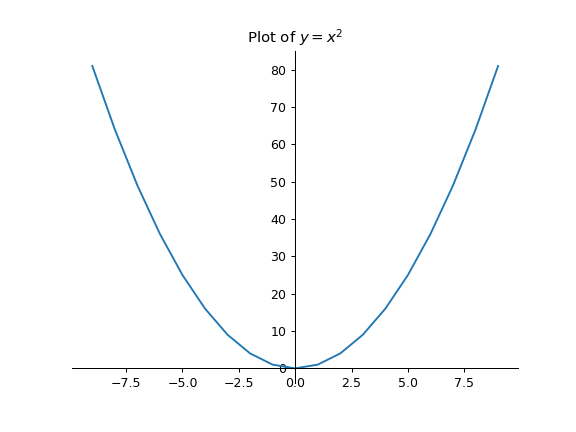

In [26]:
fig, ax = plt.subplots(1)

ax.set(title="Plot of $y = x^2$")

ax.plot([i for i in range(-9, 10)], [i ** 2 for i in range(-9, 10)])

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# move bottom spine up to y=0 position:
ax.tick_params(axis='x', labelbottom=True)
ax.spines['bottom'].set_position(('data',0))

# move left spine to the right to position x == 0:
ax.tick_params(axis='x', labelleft=True)
ax.spines['left'].set_position(('data',0))

fig.show()

## More Advanced Plotting: Grouping, Multiple Subplots, Shared Axes, Faceting

Finally, we can preview some more advanced plotting techniques.

These techniques serve to organize information and combat overplotting.


### Grouping

Grouping is one technique used to facilitate comparing data from different groups.

We saw an example of grouping when looking at `ax.plot()`.

To plot data by group, we simply plot each group to the same axis.

Here is a scatterplot example.

           elected  percent_votes_lag  percent_votes
36483  Not elected           3.325782       1.633697
30558      Elected          48.423744      61.914375
32324      Elected          61.914375      67.776779
35065      Elected          67.776779      52.017456
35828      Elected          52.017456      54.357201
...            ...                ...            ...
39961      Elected          72.963356      75.124046
41991      Elected          75.124046      63.773746
39492  Not elected           4.835937       3.896695
31622  Not elected          40.730431      29.334703
32934  Not elected          29.334703      32.228180

[5884 rows x 3 columns]


<IPython.core.display.Javascript object>


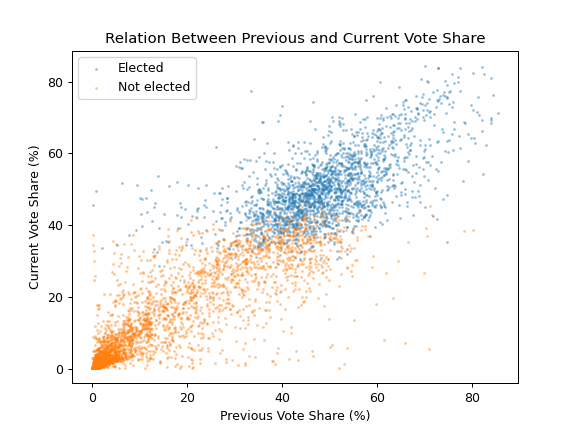

In [27]:
data = df.sort_values(["id", "year"])
data["percent_votes_lag"] = data.groupby("id").percent_votes.shift()

data = data[["elected", "percent_votes_lag", "percent_votes"]].dropna()
print(data)

fig, ax = plt.subplots(1)

ax.set(
    title="Relation Between Previous and Current Vote Share",
    xlabel="Previous Vote Share (%)",
    ylabel="Current Vote Share (%)")

for name, _data in data.groupby("elected"):
    ax.scatter(
        x="percent_votes_lag", 
        y="percent_votes",
        s=2,
        alpha=.3,
        data=_data,
        label=name)

ax.legend()

fig.show()

#### Exercise

Can you group the data above by gender?

What do you think about the resulting graph?

      gender  percent_votes_lag  percent_votes
36483      M           3.325782       1.633697
30558      M          48.423744      61.914375
32324      M          61.914375      67.776779
35065      M          67.776779      52.017456
35828      M          52.017456      54.357201
...      ...                ...            ...
39961      M          72.963356      75.124046
41991      M          75.124046      63.773746
39492      F           4.835937       3.896695
31622      M          40.730431      29.334703
32934      M          29.334703      32.228180

[5884 rows x 3 columns]


<IPython.core.display.Javascript object>


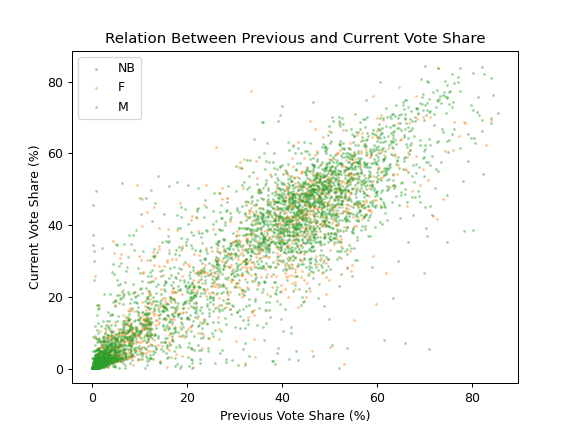

In [28]:
data = df.sort_values(["id", "year"])
data["percent_votes_lag"] = data.groupby("id").percent_votes.shift()

data = data[["gender", "percent_votes_lag", "percent_votes"]].dropna()
print(data)

fig, ax = plt.subplots(1)

ax.set(
    title="Relation Between Previous and Current Vote Share",
    xlabel="Previous Vote Share (%)",
    ylabel="Current Vote Share (%)")

for name, _data in data.groupby("gender"):
    ax.scatter(
        x="percent_votes_lag", 
        y="percent_votes",
        s=2,
        alpha=.3,
        data=_data,
        label=name)

ax.legend()

fig.show() # Looks pretty bad

#### Grouped Bar Chart

In experimental settings, people like to show bar charts grouped by conditions. 

This is a little bit more involved to do.

        elected censuscategory  pct_votes_mean  pct_votes_sem
0       Elected       Business       48.861333       0.561864
1       Elected         Health       48.188958       1.636044
2       Elected     Management       45.835736       0.679990
3       Elected             MP       51.610285       0.279760
4       Elected        Science       44.418953       1.213197
5       Elected      Resources       52.301419       1.258999
6       Elected        Culture       45.593016       1.172285
7       Elected         Social       48.636737       0.386477
8       Elected  Manufacturing       39.955230       2.852566
9       Elected          Sales       44.915658       1.365055
10      Elected         Trades       45.590695       2.377972
11  Not elected       Business       12.100678       0.240889
12  Not elected         Health        9.397527       0.468727
13  Not elected     Management       12.610574       0.361463
14  Not elected             MP       25.694059       0.497696
15  Not 

<IPython.core.display.Javascript object>


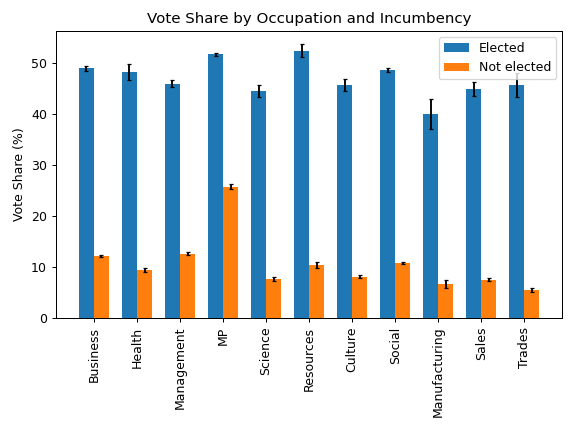

In [29]:
gs = df.groupby(["elected", "censuscategory"]).percent_votes
data = (
    pd.concat(
        [gs.mean().rename("pct_votes_mean"), gs.sem().rename("pct_votes_sem")],
        axis=1)
    .reset_index())
print(data)

x = pd.Series([i for i in range(len(data.censuscategory.cat.categories))])
width = .35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(
    x - width/2, 
    data[data.elected == "Elected"].pct_votes_mean, 
    width, 
    yerr=data[data.elected == "Elected"].pct_votes_sem,
    capsize=2,
    label='Elected')

rects2 = ax.bar(
    x + width/2, 
    data[data.elected == "Not elected"].pct_votes_mean,
    width, 
    yerr=data[data.elected == "Not elected"].pct_votes_sem,
    capsize=2,
    label='Not elected')

ax.set(
    title="Vote Share by Occupation and Incumbency",
    ylabel="Vote Share (%)",
    xticks=x,
    xticklabels=data.censuscategory.cat.categories)

ax.tick_params(axis="x", labelrotation = 90)

ax.legend()

fig.tight_layout()

plt.show()

### Multiple Subplots & Faceting

Often, we want to have multiple subplots in the same figure. 

Sometimes, this is done to provide additional information.

But, often, it is done to prevent overplotting. This is called faceting.

Consider the scatterplot by gender that we created previously.

Let's split each view into multiple subplots.

      gender  percent_votes_lag  percent_votes
36483      M           3.325782       1.633697
30558      M          48.423744      61.914375
32324      M          61.914375      67.776779
35065      M          67.776779      52.017456
35828      M          52.017456      54.357201
...      ...                ...            ...
39961      M          72.963356      75.124046
41991      M          75.124046      63.773746
39492      F           4.835937       3.896695
31622      M          40.730431      29.334703
32934      M          29.334703      32.228180

[5884 rows x 3 columns]


<IPython.core.display.Javascript object>


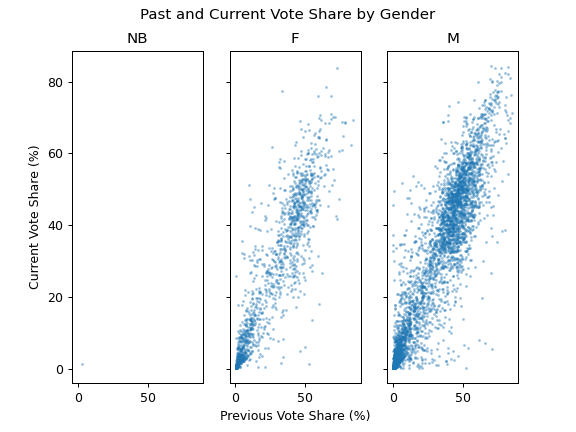

In [30]:
data = df.sort_values(["id", "year"])
data["percent_votes_lag"] = data.groupby("id").percent_votes.shift()

data = data[["gender", "percent_votes_lag", "percent_votes"]].dropna()
print(data)

fig, axs = plt.subplots(ncols=3, sharex=True, sharey=True)


for ax, (name, _data) in zip(axs, data.groupby("gender")):
    ax.set(title=name)
    ax.scatter(
        x="percent_votes_lag", 
        y="percent_votes",
        s=2,
        alpha=.3,
        data=_data)

axs[0].set(ylabel="Current Vote Share (%)")
axs[1].set(xlabel="Previous Vote Share (%)")

fig.suptitle("Past and Current Vote Share by Gender")
    
fig.show() # Looks pretty bad

#### Exercise

We are actually employing three different strategies for dealing with overplotting here.

Can you name them?

## Conclusion

This is the end of our whirlwind tour of data visualization in Python using `matplotib`. 

I'll leave you with some pointers for further exploration.

### Advanced matplotlib

- Customizing subplot layouts
- Controling scaling (log, semilog, etc.)
- Plotting images, quivers, and 3D data
- Creating animations

### Other Plotting Tools Using Matplotlib

- Seaborn, providing more convenient APIs for typical data science plotting (e.g. grouping)
- plotnine, grammar of graphics in Python, uses matplotlib as backend